In [1]:
import os

In [2]:
from sklearn import tree
X = [[0, 0], [1, 1]] #toy example with two instances and two attributes
Y = [0, 1]
clf = tree.DecisionTreeClassifier() #create the clf object with options you wanna work with
clf = clf.fit(X, Y)

In [4]:
clf.predict([[2., 2.]])

array([1])

In [10]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [5]:
from sklearn.datasets import load_iris #iris data set which is built in
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier() #create the clf object with options you wanna work with
clf = clf.fit(iris.data, iris.target)

In [7]:
import graphviz #this is for visualizing your tree. Make sure that you have graphviz installed (>conda install graphviz)
import os
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") #this will save a pdf file iris.pdf



'iris.pdf'

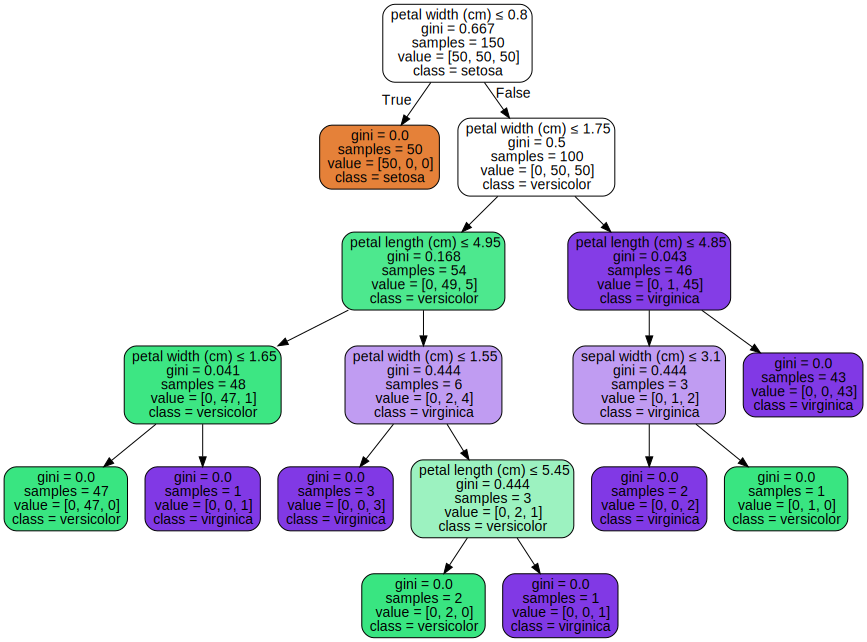

In [8]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [10]:
import pandas as pd
train = pd.read_csv('../data/diabetes_train.csv') #this is our dataset, please change the path for your case
test = pd.read_csv('../data/diabetes_test.csv')
train.columns[:8] #wanted to show which attributs we have



Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')

In [11]:
clf = tree.DecisionTreeClassifier() #create the clf object with options you wanna work with
clf = clf.fit(train.iloc[:,0:8], train.iloc[:,8]) #first paramater data, second labels


In [12]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=train.columns[:8],  
                     class_names=train.iloc[:,8],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
graph.render("../data/diabetes_train")

'../data/diabetes_train.pdf'

In [13]:
y_pred = clf.predict(test.iloc[:,0:8]) #doing prediction on unknown test set
y_pred

array(['tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_negative'], dtype=object)

In [14]:
from sklearn.metrics import confusion_matrix #let's see how good we did
y_true = test.iloc[:,8]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp 

(6, 1, 1, 2)